In [1]:

import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

from sklearn import preprocessing as pp 

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import tensorflow as tf


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000, 784))


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 784)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [4]:
train_index = range(0,len(X_train))
test_index = range(len(X_train), len(X_train)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)


In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [6]:
y_train.head()

0    9
1    0
2    0
3    3
4    0
dtype: uint8

In [7]:
labels_dict = {
    0: "tshirt",
    1: "pants",
    2: "sweater",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "dressshirt",
    7: "sneaker",
    8: "bag",
    9: "ankleboot",
}
    
y_train_labels = y_train.map(labels_dict)


In [8]:
y_train_labels.value_counts()

ankleboot     6000
tshirt        6000
dress         6000
sweater       6000
sneaker       6000
sandal        6000
pants         6000
dressshirt    6000
coat          6000
bag           6000
dtype: int64

In [9]:
def view_image(data, labels, english_labels, example, type = None):
    if type != None:
      slice = english_labels[english_labels==type].index
      data = data.loc[slice]
    for i in range(example):
      label = labels.loc[slice].iloc[i]
      english_label = english_labels.loc[slice].iloc[i]
      image = data.iloc[i,:].values.reshape([28,28])
      plt.title('Example: %d Label: %d English Label: %s' % (i, label, english_label))
      plt.imshow(image, cmap=plt.get_cmap('gray'))
      plt.show()


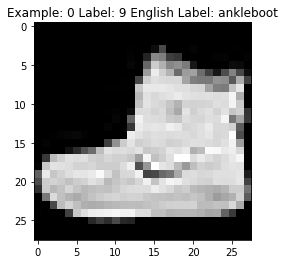

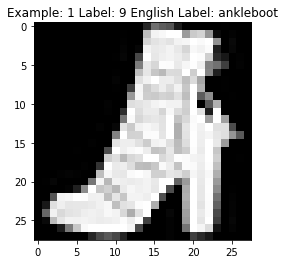

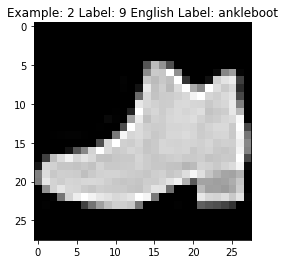

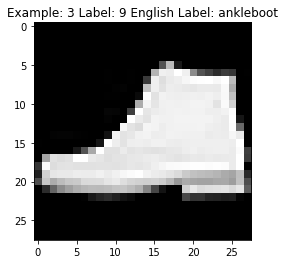

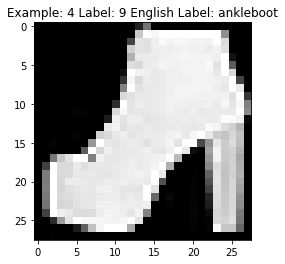

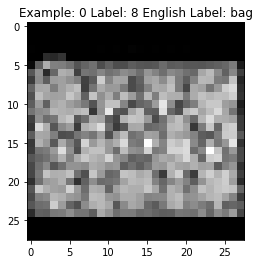

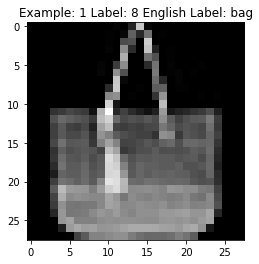

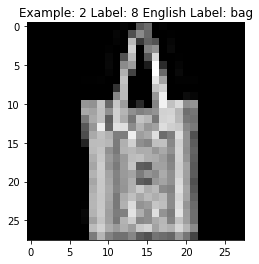

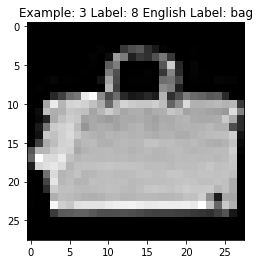

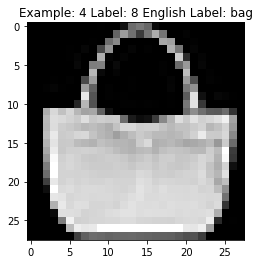

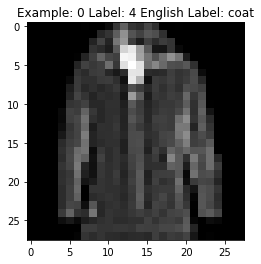

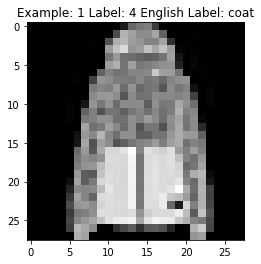

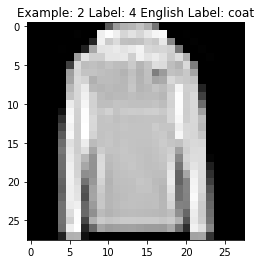

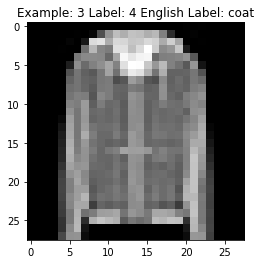

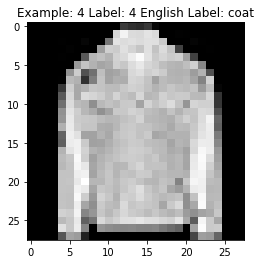

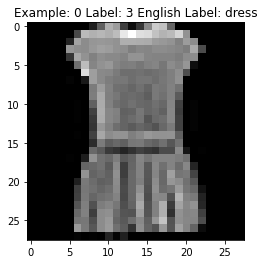

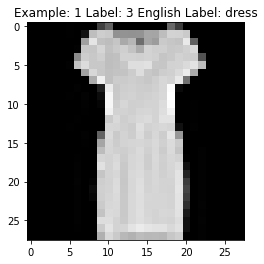

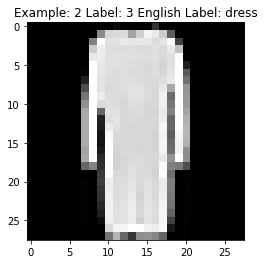

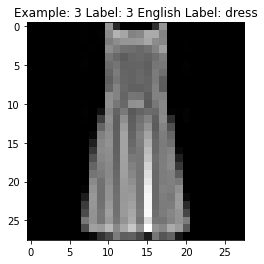

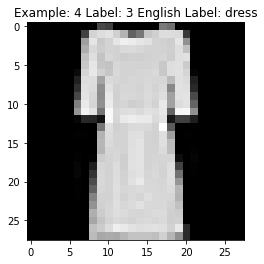

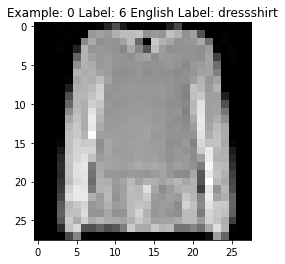

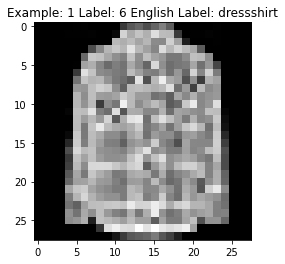

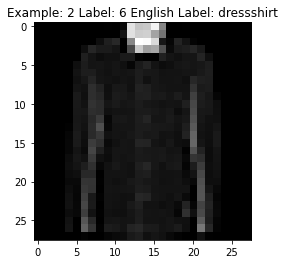

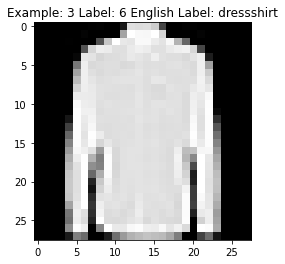

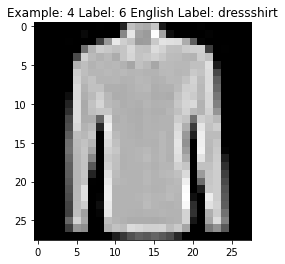

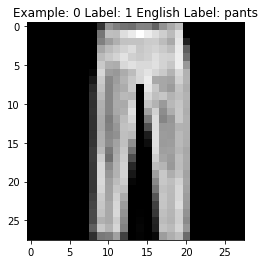

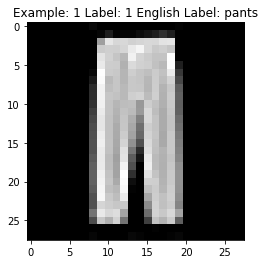

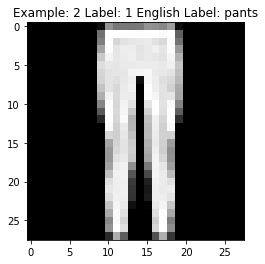

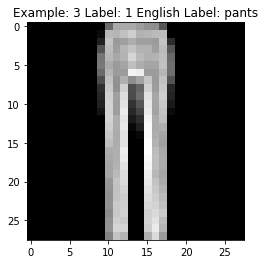

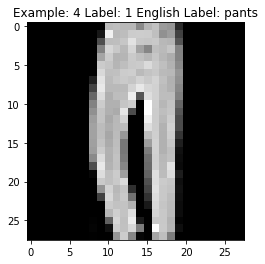

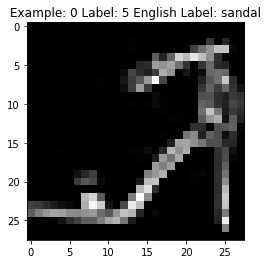

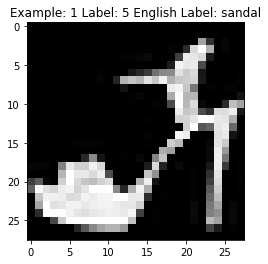

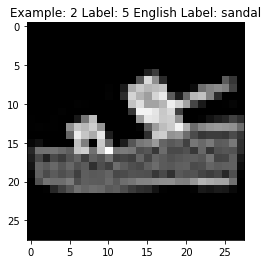

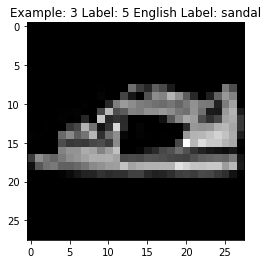

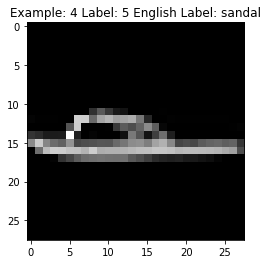

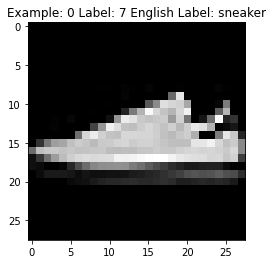

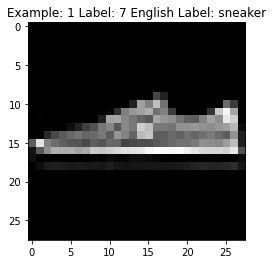

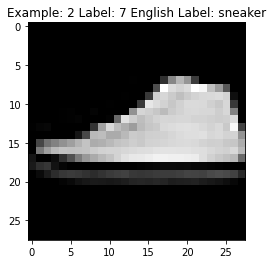

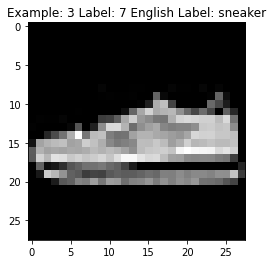

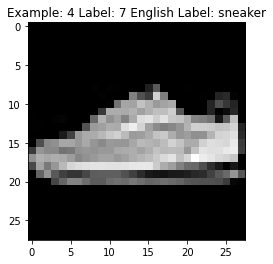

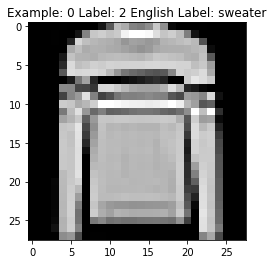

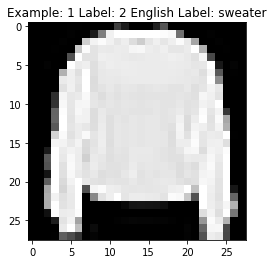

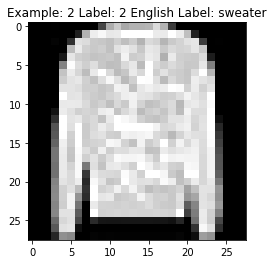

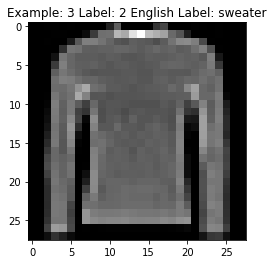

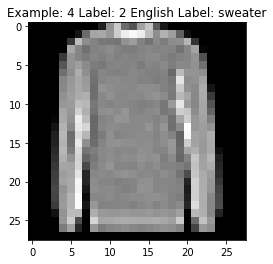

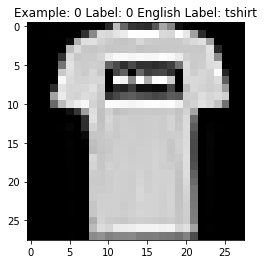

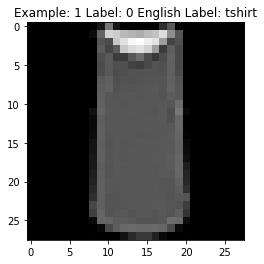

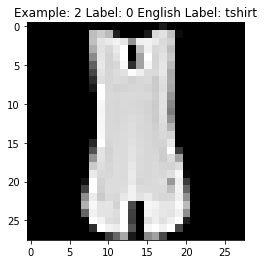

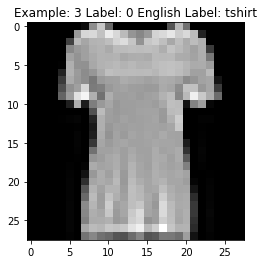

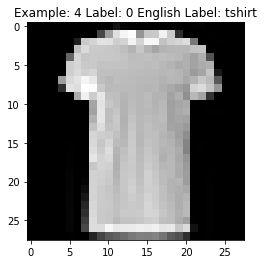

In [11]:
for i in np.unique(y_train_labels.values):
  view_image(X_train, y_train, y_train_labels, 5, i)

In [12]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [15]:
cwd = os.getcwd()
log_dir = cwd+"/"

In [ ]:
print(cwd)

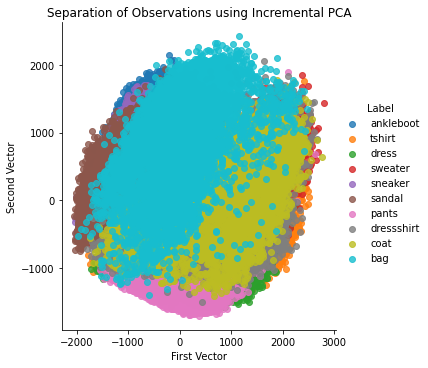

In [16]:
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

scatterPlot(X_train_incrementalPCA, y_train_labels, "Incremental PCA")

# Write dimensions to CSV
X_train_incrementalPCA.iloc[0:2000,0:3].to_csv(log_dir+'incremental_pca_data.tsv', sep = '\t', index=False, header=False)